In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import pdb
import scipy.stats as stats
import scipy
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
from itertools import chain

In [5]:
data_dir = f'/lab_data/behrmannlab/claire/pepdoc/results_ex1' #read in the file; first value is the file name
curr_dir = f'/user_data/vayzenbe/GitHub_Repos/pepdoc' #CHANGE AS NEEEDED CAUSE ITS FOR VLAAAD
bin_size = 5 #20 ms bins (EACH BIN IS 4 MS SO 5 ROWS ARE 20 MS)
# bin_size = 1 
categories = ['tool','nontool','bird','insect']
labels = np.asanyarray([0]*5 + [1]*5 + [2]*5 + [3]*5) #creates labels for data

#d_channels
channels = [77, 78, 79, 80, 86, 87, 88, 89, 98, 99, 100, 110, 109, 118, 131, 143, 154, 163, 130, 142, 153, 162, 129, 141, 152, 128, 140, 127] # a list of channels
columns  =[f'E{ii}' for ii in channels] #convert channels into the same format as the columns

#v_channels
ventral_channels = [104, 105, 106, 111, 112, 113, 114, 115, 120, 121, 122, 123, 133, 134, 169, 177, 189, 159, 168, 176, 18, 199, 158, 167, 175, 187, 166, 174] # a list of channels
ventral_columns  =[f'E{ii}' for ii in ventral_channels] #convert channels into the same format as the columns

#c_channels
control_channels =  [11, 12, 18, 19, 20, 21, 25, 26, 27, 32, 33, 34, 37, 38]
control_columns  =[f'E{ii}' for ii in control_channels] #convert channels into the same format as the columns

svm_test_size = .4
svm_splits = 20
sss = StratifiedShuffleSplit(n_splits=svm_splits, test_size=svm_test_size)

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

In [6]:
d_sub_decode =np.load(f'{curr_dir}/results/d_sub_decode.npy')
v_sub_decode =np.load(f'{curr_dir}/results/v_sub_decode.npy')
c_sub_decode =np.load(f'{curr_dir}/results/c_sub_decode.npy')

In [46]:
"""
GCA analyses
"""
start = 9
end = 75+start

f_diff = []
for sub in range(0,d_sub_decode.shape[0]):
    df = pd.DataFrame()
    df['dorsal'] = d_sub_decode[sub,start:end]
    df['ventral'] = v_sub_decode[sub,start:end]
    df = df.diff().dropna()

    gc_dorsal = grangercausalitytests(df[['ventral','dorsal']], maxlag=13)
    gc_ventral = grangercausalitytests(df[['dorsal','ventral']], maxlag=13)

    dorsal_f = []
    ventral_f = []
    for gcn in range(1,len(gc_dorsal)):
        dorsal_f.append(gc_dorsal[gcn][0]['ssr_ftest'][0])
        ventral_f.append(gc_ventral[gcn][0]['ssr_ftest'][0])

    max_dorsal = np.max(dorsal_f)
    max_ventral = np.max(ventral_f)

    f_diff.append(max_dorsal - max_ventral)
    

    
    #f_diff = gc_res_dorsal[1][0]['ssr_ftest'][0]-gc_res_ventral[1][0]['ssr_ftest'][0]



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5284  , p=0.4697  , df_denom=70, df_num=1
ssr based chi2 test:   chi2=0.5511  , p=0.4579  , df=1
likelihood ratio test: chi2=0.5490  , p=0.4587  , df=1
parameter F test:         F=0.5284  , p=0.4697  , df_denom=70, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.5445  , p=0.2209  , df_denom=67, df_num=2
ssr based chi2 test:   chi2=3.3196  , p=0.1902  , df=2
likelihood ratio test: chi2=3.2453  , p=0.1974  , df=2
parameter F test:         F=1.5445  , p=0.2209  , df_denom=67, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.1567  , p=0.0307  , df_denom=64, df_num=3
ssr based chi2 test:   chi2=10.5059 , p=0.0147  , df=3
likelihood ratio test: chi2=9.7977  , p=0.0204  , df=3
parameter F test:         F=3.1567  , p=0.0307  , df_denom=64, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.7158  , p=0.0379  , df_d

In [48]:
np.savetxt('f_diff.txt',f_diff)

In [45]:
np.mean(f_diff)

0.49735693814150606

In [23]:
gc_dorsal

{1: ({'ssr_ftest': (0.6810573163753846, 0.4108469386471135, 121.0, 1),
   'ssr_chi2test': (0.697943034963204, 0.40347572865920056, 1),
   'lrtest': (0.6959861628478166, 0.404135697429468, 1),
   'params_ftest': (0.6810573163753699, 0.4108469386471181, 121.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.1394862283869388, 0.8699482055191625, 118.0, 2),
   'ssr_chi2test': (0.2907933235863301, 0.8646792398593852, 2),
   'lrtest': (0.2904501214911761, 0.8648276324545614, 2),
   'params_ftest': (0.1394862283869497, 0.869948205519151, 118.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.09927772714481851, 0.9602659384274351, 115.0, 3),
   'ssr_chi2test': (0.3159621576956833, 0.9569990012648316, 3),
   'lrtest': (0.3155537148587655, 0.9570771914985055, 3),
   'params_ftest': (0.09927772714480922, 0.9602659384274423, 115.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 

In [16]:



df = pd.DataFrame()
df['dorsal'] = np.mean(d_sub_decode, axis=0)
df['ventral'] = np.mean(v_sub_decode,axis = 0)

df = df.diff().dropna()

grangercausalitytests(df[['dorsal','ventral']], maxlag=13)
f_diff = gc_res_dorsal[1][0]['ssr_ftest'][0]-gc_res_ventral[1][0]['ssr_ftest'][0]


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1646  , p=0.6857  , df_denom=129, df_num=1
ssr based chi2 test:   chi2=0.1684  , p=0.6816  , df=1
likelihood ratio test: chi2=0.1683  , p=0.6817  , df=1
parameter F test:         F=0.1646  , p=0.6857  , df_denom=129, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3243  , p=0.7236  , df_denom=126, df_num=2
ssr based chi2 test:   chi2=0.6744  , p=0.7138  , df=2
likelihood ratio test: chi2=0.6727  , p=0.7144  , df=2
parameter F test:         F=0.3243  , p=0.7236  , df_denom=126, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.0072  , p=0.3921  , df_denom=123, df_num=3
ssr based chi2 test:   chi2=3.1935  , p=0.3627  , df=3
likelihood ratio test: chi2=3.1549  , p=0.3684  , df=3
parameter F test:         F=1.0072  , p=0.3921  , df_denom=123, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.9477  , p=0.4390  

{1: ({'ssr_ftest': (0.16455375581789175, 0.6856701503101161, 129.0, 1),
   'ssr_chi2test': (0.1683805873485404, 0.681555059325486, 1),
   'lrtest': (0.16827328456611212, 0.6816509756474652, 1),
   'params_ftest': (0.1645537558178647, 0.6856701503101421, 129.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.3243235209847226, 0.7236180597963687, 126.0, 2),
   'ssr_chi2test': (0.6743870039523597, 0.7137707104959743, 2),
   'lrtest': (0.6726570689561413, 0.7143883660491357, 2),
   'params_ftest': (0.32432352098473105, 0.7236180597963586, 126.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.0071846685444519, 0.39207148410249343, 123.0, 3),
   'ssr_chi2test': (3.19351236367753, 0.3627408308292422, 3),
   'lrtest': (3.154918063197556, 0.3683510673643519, 3),
   'params_ftest': (1.007184668544449, 0.392071484102494, 123.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0.

In [4]:
'''Time Comparison'''
#dorsal
d_sub_decode = np.asanyarray(d_sub_decode)
d_timecomp = []
for i in range(0, d_sub_decode.shape[1]):
    a = stats.ttest_1samp((d_sub_decode[:,i]), .25, axis = 0, alternative='greater')
    d_timecomp.append(a)


#ventral
v_sub_decode = np.asanyarray(v_sub_decode)
v_timecomp = []
for i in range(0, v_sub_decode.shape[1]):
    a = stats.ttest_1samp((v_sub_decode[:,i]), .25, axis = 0, alternative='greater')
    v_timecomp.append(a)


#control
c_sub_decode = np.asanyarray(c_sub_decode)
c_timecomp = []
for i in range(0, c_sub_decode.shape[1]):
    a = stats.ttest_1samp((c_sub_decode[:,i]), .25, axis = 0, alternative='greater')
    c_timecomp.append(a)



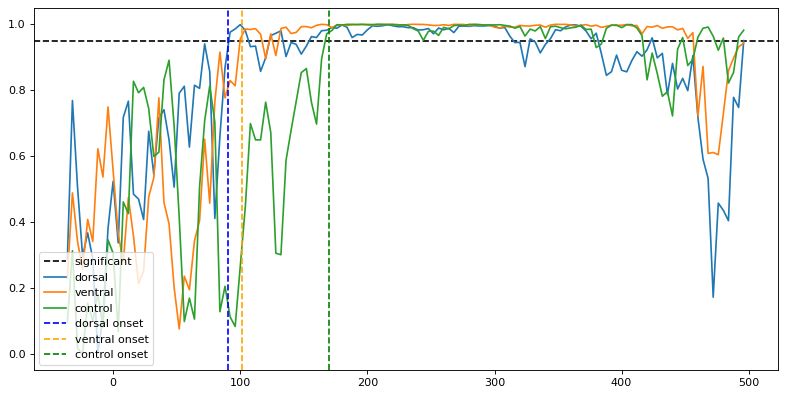

In [5]:
from matplotlib.pyplot import figure

timepoints = list(range(-36, 500, 4))
fig = figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.axhline(.95, color = 'k', label='significant', linestyle='--')

d_timecomp = np.asanyarray(d_timecomp)
plt.plot(timepoints, 1-(d_timecomp[:,1]), label = 'dorsal')

v_timecomp = np.asanyarray(v_timecomp)
plt.plot(timepoints, 1-(v_timecomp[:,1]), label = 'ventral')

c_timecomp = np.asanyarray(c_timecomp)
plt.plot(timepoints, 1-(c_timecomp[:,1]), label = 'control')
plt.axvline(90, color = 'b', label='dorsal onset', linestyle='--')
plt.axvline(101, color = 'orange', label='ventral onset', linestyle='--')
plt.axvline(170, color = 'green', label='control onset', linestyle='--')


plt.legend(loc='lower left')

In [32]:
d_sub_decode.shape

(20, 134)

In [35]:
#RESAMPLING

#how many times to do the resampling
#we'll eventually set this to somethign really high like 10,000
iter = 1000

start = 9
end = d_sub_decode.shape[1]


d_sub_decode_short = d_sub_decode[:, start:end]
v_sub_decode_short = v_sub_decode[:, start:end]
c_sub_decode_short = c_sub_decode[:, start:end]
#subs = np.arange(0,20).reshape(20,1)
#d_sub_decode_short = np.append(subs, d_sub_decode,1)
#v_sub_decode_short = np.append(subs, v_sub_decode,1)
#c_sub_decode_short = np.append(subs, c_sub_decode,1)
#d_sub_decode_short = d_sub_decode

#d_sub_decode_short = d_sub_decode

#convert data to pandas dataframe
#this is just because pandas has a good resampling function 
d_sub_decode_short = pd.DataFrame(d_sub_decode_short)
v_sub_decode_short = pd.DataFrame(v_sub_decode_short)
c_sub_decode_short = pd.DataFrame(c_sub_decode_short)

#Create empty lists that will hold the results of each resample
d_boot = []
v_boot = []
c_boot = []

d_sub_counts = np.zeros((2,d_sub_decode_short.shape[1]))
v_sub_counts = np.zeros((2,d_sub_decode_short.shape[1]))
c_sub_counts = np.zeros((2,d_sub_decode_short.shape[1]))

d_sub_counts[1,:] = np.arange(0,d_sub_decode_short.shape[1])
v_sub_counts[1,:] = np.arange(0,v_sub_decode_short.shape[1])
c_sub_counts[1,:] = np.arange(0,c_sub_decode_short.shape[1])

for ii in range(0,iter):
    
    #resample the sub decode data with replacement
    d_sub_sample = d_sub_decode_short.sample(d_sub_decode_short.shape[0],replace = True, random_state=ii)
    v_sub_sample = v_sub_decode_short.sample(v_sub_decode_short.shape[0],replace = True, random_state=ii)
    c_sub_sample = c_sub_decode_short.sample(c_sub_decode_short.shape[0],replace = True, random_state=ii)
    
    #convert it back to a numpy array
    d_sub_sample = d_sub_sample.to_numpy() 
    v_sub_sample = v_sub_sample.to_numpy()
    c_sub_sample = c_sub_sample.to_numpy()

    #calculate the bootstrap sample mean
    d_timecomp = []
    v_timecomp = []
    c_timecomp = []

    d_consistent = []
    v_consistent = []
    c_consistent = []
    
    for time in range(0,d_sub_sample.shape[1]):
        d_stat= stats.ttest_1samp(d_sub_sample[:,time], .25, axis = 0, alternative='greater')
        v_stat = stats.ttest_1samp(v_sub_sample[:,time], .25, axis = 0, alternative='greater')
        c_stat = stats.ttest_1samp(c_sub_sample[:,time], .25, axis = 0, alternative='greater')

        #append the p-value for every time point
        d_timecomp.append(d_stat[1])  
        v_timecomp.append(v_stat[1])
        c_timecomp.append(c_stat[1])

        #mark timepoints that are above chance for at least two timepoints in a row
        if time > 0:

            if d_timecomp[time] < .05 and d_timecomp[time-1] <.05:
                d_consistent.append(1)
            else:
                d_consistent.append(0)

            if v_timecomp[time] < .05 and v_timecomp[time-1] <.05:
                v_consistent.append(1)
            else:
                v_consistent.append(0)

            if c_timecomp[time] < .05 and c_timecomp[time-1] <.05:
                c_consistent.append(1)
            else:
                c_consistent.append(0)

        
    #reconvert p-value list into a numpy array
    d_timecomp = np.asanyarray(d_timecomp)
    v_timecomp = np.asanyarray(v_timecomp)
    c_timecomp = np.asanyarray(c_timecomp)

    #reconvert consistent list into a numpy array
    d_consistent = np.asanyarray(d_consistent)
    v_consistent = np.asanyarray(v_consistent)
    c_consistent = np.asanyarray(c_consistent)

    
    #find the the first time point that is below change (0.05)
    #np.where simply returns the indices (i.e., spots in an array), that meet some condition
    #i'm simply grabbing the first value of that list, which corresponds to the first time point above chance
    try:
        d_onset = np.where(d_consistent ==1,)[0][0]
    except:
        d_onset = end
    
    try:
        v_onset = np.where(v_consistent ==1,)[0][0]
    except:
        v_onset = end
    
    try:
        c_onset = np.where(c_consistent ==1,)[0][0]
    except:
        c_onset = end

    
    
    d_sub_counts[0,np.where(d_timecomp <.05)[0]] += 1
    v_sub_counts[0,np.where(v_timecomp <.05)[0]] += 1
    c_sub_counts[0,np.where(c_timecomp <.05)[0]] += 1

    #if d_onset == 1:
    #    pdb.set_trace()
    
    #convert to the actual time point
    d_onset_converted = d_onset
    v_onset_converted = v_onset
    c_onset_converted = c_onset

    d_onset_converted = (d_onset+start) *4
    v_onset_converted = (v_onset+start) *4
    c_onset_converted = (c_onset+start) *4

    #add the onset value from the resample to a list
    d_boot.append(d_onset_converted)
    v_boot.append(v_onset_converted)
    c_boot.append(c_onset_converted)

In [27]:
120/4

30.0

In [36]:
d_boot = np.asanyarray(d_boot)
v_boot = np.asanyarray(v_boot)

diff = d_boot - v_boot

In [37]:
print(np.percentile(diff,[5,95]))

[-96.  36.]


In [38]:
np.sum(diff<0)

767

In [ ]:
np.savetxt('diff.txt',diff)

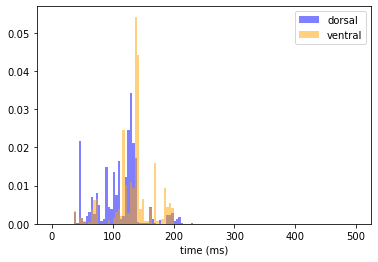

In [39]:

plt.hist(d_boot, range = [0, 500], label='dorsal', color='b', alpha=.5, bins= 125, density=True)
plt.hist(v_boot,range = [0, 500], label='ventral', color='orange', alpha=.5, bins= 125, density=True)
#plt.hist(c_boot,range = [0, 150], label='control', color='g', alpha=.5, bins= 150, density=True)



plt.xlabel('time (ms)')
plt.legend(loc='upper right')

(array([0.003  , 0.00025, 0.02175, 0.0015 , 0.0005 , 0.002  , 0.003  ,
        0.007  , 0.0025 , 0.008  , 0.005  , 0.00075, 0.00125, 0.01475,
        0.0045 , 0.004  , 0.0135 , 0.0075 , 0.0165 , 0.00125, 0.002  ,
        0.01225, 0.0245 , 0.03425, 0.02125, 0.01725, 0.0005 , 0.00025,
        0.00025, 0.00025, 0.00025, 0.0045 , 0.00125, 0.00025, 0.     ,
        0.001  , 0.     , 0.     , 0.00225, 0.00225, 0.00275, 0.00075,
        0.00125, 0.00175, 0.00025, 0.     , 0.     , 0.     , 0.00025,
        0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
      

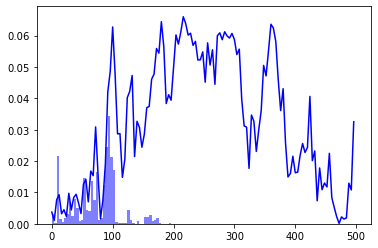

In [51]:
plt.plot(timepoints,d_sub_counts[0,:]/15000,label = 'dorsal', color = 'b')
plt.hist(d_boot, range = [0, 500], label='dorsal', color='b', alpha=.5, bins= 125, density=True)

(array([0.00325, 0.     , 0.0015 , 0.0015 , 0.00075, 0.     , 0.0005 ,
        0.00375, 0.00625, 0.0065 , 0.     , 0.     , 0.     , 0.     ,
        0.001  , 0.     , 0.0015 , 0.003  , 0.004  , 0.002  , 0.0245 ,
        0.01025, 0.00275, 0.011  , 0.0095 , 0.05425, 0.04425, 0.004  ,
        0.0065 , 0.00075, 0.00075, 0.00425, 0.     , 0.016  , 0.00075,
        0.00025, 0.00125, 0.00925, 0.0045 , 0.0055 , 0.00425, 0.     ,
        0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
      

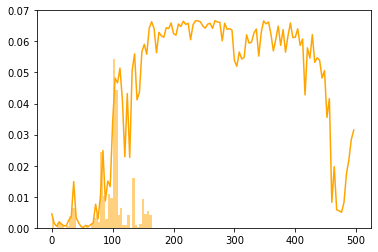

In [53]:
plt.plot(timepoints,v_sub_counts[0,:]/15000,label = 'ventral', color = 'orange')
plt.hist(v_boot, range = [0, 500], label='dorsal', color='orange', alpha=.5, bins= 125, density=True)

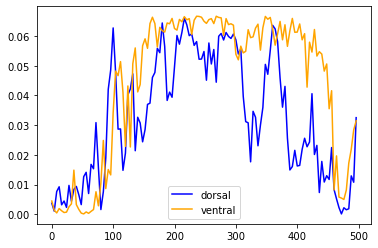

In [44]:
timepoints = list(range(0, 500, 4))
plt.plot(timepoints,d_sub_counts[0,:]/15000,label = 'dorsal', color = 'b')
plt.plot(timepoints,v_sub_counts[0,:]/15000,label = 'ventral', color = 'orange')
plt.legend()


In [60]:
148/4

37.0

In [31]:
timepoints = list(range(0, 500, 4))

In [33]:
len(timepoints)

125

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

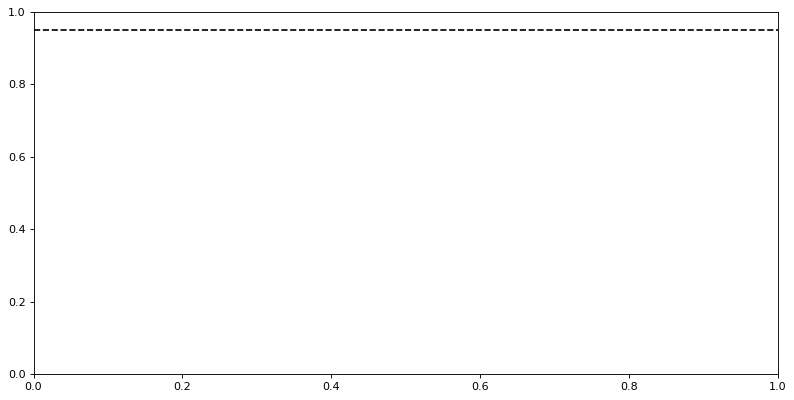

In [30]:
from matplotlib.pyplot import figure

timepoints = list(range(0, 500, 4))
fig = figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.axhline(.95, color = 'k', label='significant', linestyle='--')

d_timecomp = np.asanyarray(d_timecomp)
plt.plot(timepoints, 1-(d_timecomp[:,1]), label = 'dorsal')

v_timecomp = np.asanyarray(v_timecomp)
plt.plot(timepoints, 1-(v_timecomp[:,1]), label = 'ventral')

c_timecomp = np.asanyarray(c_timecomp)
plt.plot(timepoints, 1-(c_timecomp[:,1]), label = 'control')
plt.axvline(90, color = 'b', label='dorsal onset', linestyle='--')
plt.axvline(101, color = 'orange', label='ventral onset', linestyle='--')
plt.axvline(170, color = 'green', label='control onset', linestyle='--')


plt.legend(loc='lower left')

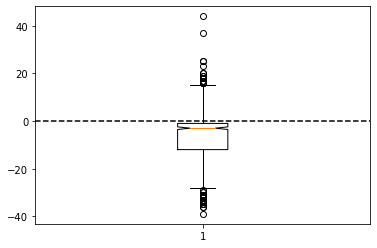

In [24]:
plt.boxplot(diff,notch=True)
plt.axhline(0, color = 'k', label='significant', linestyle='--')

In [12]:
#plot the difference values with confidence intervals
alpha = .05
ci_low = np.percentile(diff, alpha*100)
ci_high= np.percentile(diff, 100-alpha*100)

In [13]:
print(ci_low, ci_high)

nan nan


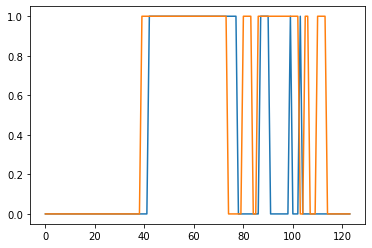

In [11]:
plt.plot(d_consistent)
plt.plot(v_consistent)

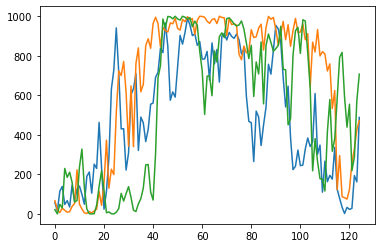

In [64]:
plt.plot(d_sub_counts[0,:])
plt.plot(v_sub_counts[0,:])
plt.plot(c_sub_counts[0,:])

In [7]:
d_sub_counts.shape

(1, 134)

In [ ]:
d_sub_counts.append(np.arrange(0,len(d_sub_counts)))

In [68]:
alpha = .1
window = 10
sig_diff = []
d_mean = []
v_mean = []
mean_times = []
for ii in range(0, d_sub_counts.shape[1]):
    d_times = []
    v_times = []
    c_times = []
    for kk in range(ii, ii + window):
        d_times.append([d_sub_counts[1,kk]]*int(d_sub_counts[0,kk]))
        v_times.append([v_sub_counts[1,kk]]*int(v_sub_counts[0,kk]))
        c_times.append([c_sub_counts[1,kk]]*int(c_sub_counts[0,kk]))

    d_times = list(chain.from_iterable(d_times))
    v_times = list(chain.from_iterable(v_times))
    c_times = list(chain.from_iterable(c_times))

    d_ci = [np.mean(d_times), np.percentile(d_times, alpha*100), np.percentile(d_times, 100-alpha*100)]
    v_ci = [np.mean(v_times),np.percentile(v_times, alpha*100), np.percentile(v_times, 100-alpha*100)]
    c_ci = [np.mean(c_times),np.percentile(c_times, alpha*100), np.percentile(c_times, 100-alpha*100)]

    d_mean.append(d_ci[0])
    v_mean.append(v_ci[0])
    mean_times.append(d_ci[0]-v_ci[0])

    if d_ci[2] < v_ci[1]:
        sig_diff.append(1)
    elif v_ci[2] < d_ci[1]:
        sig_diff.append(-1)
    else:
        sig_diff.append(0)

    
    
        


IndexError: index 125 is out of bounds for axis 1 with size 125

/home/vayzenbe/anaconda3/envs/ml_new/lib/python3.9/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


ValueError: setting an array element with a sequence.

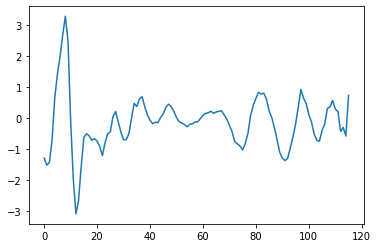

In [71]:
plt.plot(mean_times)
plt.plot(d_ci)
plt.plot(v_times)


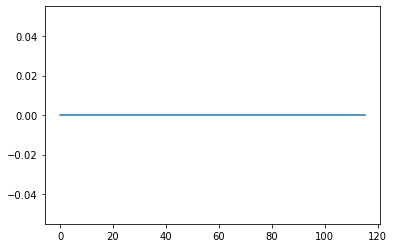

In [70]:
plt.plot(sig_diff)

In [33]:
alpha = .025
ci_low = np.percentile(d_times, alpha*100)
ci_high= np.percentile(d_times, 100-alpha*100)

In [35]:
ci_low

0.0

In [36]:
ci_high

4.0